<a href="https://colab.research.google.com/github/111Vidya/DS-Assignments/blob/main/Assignment_Clustering(Crime_data).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hierarchical Clustering

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
cd=pd.read_csv("crime_data.csv")
cd

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [ ]:
cd.shape

(50, 5)

In [ ]:
cd.columns

Index(['Unnamed: 0', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [ ]:
cd1=cd.rename({"Unnamed: 0":"States"},axis=1)
cd1.head()

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [ ]:
cd1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   States    50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [ ]:
#Normalising with SK learn minmax function
#converting all our values bw 0 and 1 with min max function
from sklearn.preprocessing import MinMaxScaler
trans = MinMaxScaler()
cd_norm= pd.DataFrame(trans.fit_transform(cd1.iloc[:,1:]))
cd_norm

,0,1,2,3
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


In [ ]:
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch

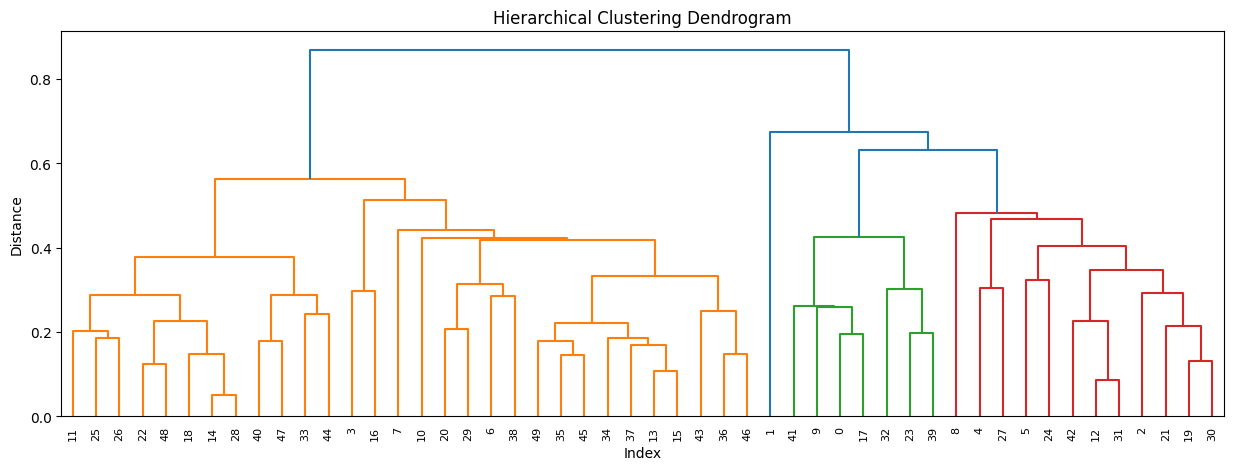

In [ ]:
#Dendrogram
z = linkage(cd_norm, method="average",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,)
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import warnings
warnings.filterwarnings('ignore')
h_complete = AgglomerativeClustering(n_clusters=4, linkage='average',affinity = "euclidean").fit(cd_norm)
cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
cd1['clust']=cluster_labels
cd1

,States,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,3


In [ ]:
#Group data set by cluster number
cd1.iloc[:,1:].groupby(cd1.clust).mean()

,Murder,Assault,UrbanPop,Rape,clust
clust,,,,,
0,4.870000,114.433333,63.633333,15.943333,0.0
1,10.883333,256.916667,78.333333,32.250000,1.0
2,10.000000,263.000000,48.000000,44.500000,2.0
3,14.671429,251.285714,54.285714,21.685714,3.0


In [ ]:
#data in each cluster from 0 to 4
data = cd1[(cd1.clust==0)]
data

,States,Murder,Assault,UrbanPop,Rape,clust
3,Arkansas,8.8,190,50,19.5,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
10,Hawaii,5.3,46,83,20.2,0
11,Idaho,2.6,120,54,14.2,0
13,Indiana,7.2,113,65,21.0,0
14,Iowa,2.2,56,57,11.3,0
15,Kansas,6.0,115,66,18.0,0
16,Kentucky,9.7,109,52,16.3,0
18,Maine,2.1,83,51,7.8,0


In [ ]:
data = cd1[(cd1.clust==1)]
data

,States,Murder,Assault,UrbanPop,Rape,clust
2,Arizona,8.1,294,80,31.0,1
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
8,Florida,15.4,335,80,31.9,1
12,Illinois,10.4,249,83,24.0,1
19,Maryland,11.3,300,67,27.8,1
21,Michigan,12.1,255,74,35.1,1
24,Missouri,9.0,178,70,28.2,1
27,Nevada,12.2,252,81,46.0,1
30,New Mexico,11.4,285,70,32.1,1


In [ ]:
data = cd1[(cd1.clust==2)]
data

,States,Murder,Assault,UrbanPop,Rape,clust
1,Alaska,10.0,263,48,44.5,2


In [ ]:
data = cd1[(cd1.clust==3)]
data

,States,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,3
9,Georgia,17.4,211,60,25.8,3
17,Louisiana,15.4,249,66,22.2,3
23,Mississippi,16.1,259,44,17.1,3
32,North Carolina,13.0,337,45,16.1,3
39,South Carolina,14.4,279,48,22.5,3
41,Tennessee,13.2,188,59,26.9,3


In [ ]:
# convert dataset to Z score , standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cd_subset = pd.DataFrame(scaler.fit_transform(cd1.iloc[:,1:5]))
cd_subset

,0,1,2,3
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814
5,0.025976,0.402909,0.869548,1.883901
6,-1.040880,-0.736484,0.799761,-1.092723
7,-0.437875,0.815030,0.450825,-0.585834
8,1.765415,1.990786,1.009122,1.150530
9,2.229265,0.487757,-0.386621,0.492653


<Figure size 1500x500 with 0 Axes>

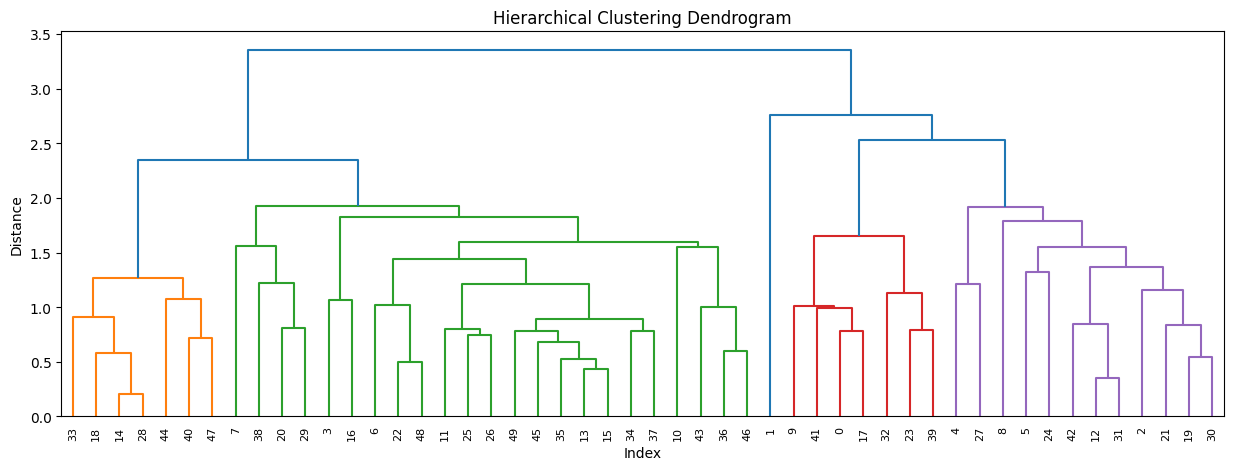

In [ ]:
# euclidean distance and linkage and dendrogram
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch
z = linkage(cd_subset, method="average",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(z,)
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import warnings
warnings.filterwarnings('ignore')
h_complete = AgglomerativeClustering(n_clusters=4, linkage='average',affinity = "euclidean").fit(cd_subset)

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
cd['clust']=cluster_labels
cd

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,3


In [ ]:
cd1.iloc[:,1:].groupby(cd1.clust).mean()

,Murder,Assault,UrbanPop,Rape,clust
clust,,,,,
0,4.870000,114.433333,63.633333,15.943333,0.0
1,10.883333,256.916667,78.333333,32.250000,1.0
2,10.000000,263.000000,48.000000,44.500000,2.0
3,14.671429,251.285714,54.285714,21.685714,3.0


In [ ]:
#data in each cluster from 0 to 4
data = cd1[(cd1.clust==0)]
data

,States,Murder,Assault,UrbanPop,Rape,clust
3,Arkansas,8.8,190,50,19.5,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
10,Hawaii,5.3,46,83,20.2,0
11,Idaho,2.6,120,54,14.2,0
13,Indiana,7.2,113,65,21.0,0
14,Iowa,2.2,56,57,11.3,0
15,Kansas,6.0,115,66,18.0,0
16,Kentucky,9.7,109,52,16.3,0
18,Maine,2.1,83,51,7.8,0


In [ ]:
data = cd1[(cd1.clust==1)]
data

,States,Murder,Assault,UrbanPop,Rape,clust
2,Arizona,8.1,294,80,31.0,1
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
8,Florida,15.4,335,80,31.9,1
12,Illinois,10.4,249,83,24.0,1
19,Maryland,11.3,300,67,27.8,1
21,Michigan,12.1,255,74,35.1,1
24,Missouri,9.0,178,70,28.2,1
27,Nevada,12.2,252,81,46.0,1
30,New Mexico,11.4,285,70,32.1,1


In [ ]:
data = cd1[(cd1.clust==2)]
data

,States,Murder,Assault,UrbanPop,Rape,clust
1,Alaska,10.0,263,48,44.5,2


In [ ]:
data = cd1[(cd1.clust==3)]
data

,States,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,3
9,Georgia,17.4,211,60,25.8,3
17,Louisiana,15.4,249,66,22.2,3
23,Mississippi,16.1,259,44,17.1,3
32,North Carolina,13.0,337,45,16.1,3
39,South Carolina,14.4,279,48,22.5,3
41,Tennessee,13.2,188,59,26.9,3


KMeans Clustering

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
#Standardise with max min fn or standardise with zscore with standard scaler
def norm_func(i):
    x = (i-i.min()) / (i.max() - i.min())
    return (x)

In [ ]:
cd1_norm = norm_func(cd1.iloc[:,1:5])
cd1_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


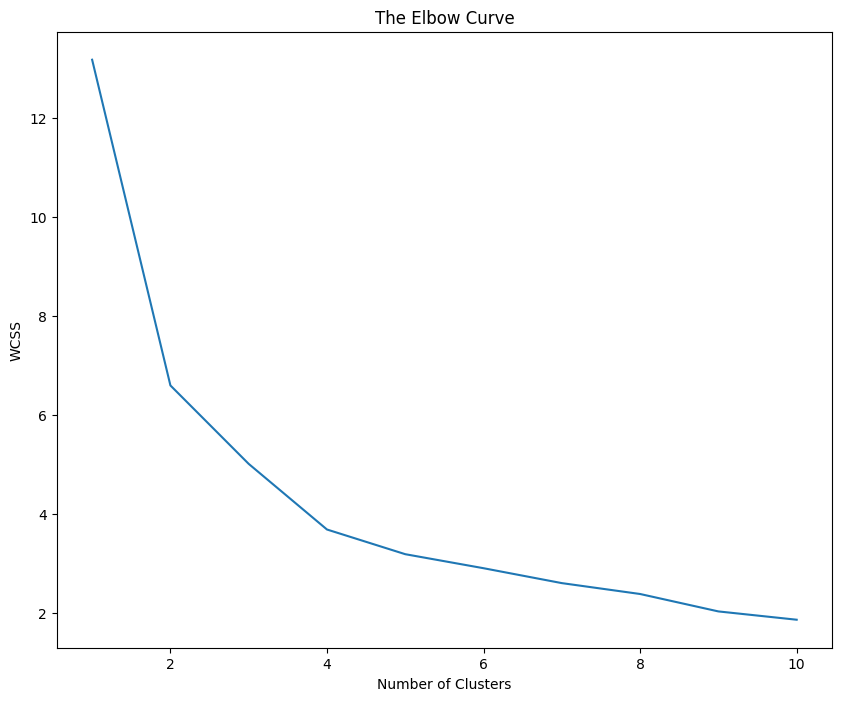

In [ ]:
from sklearn.cluster import KMeans
fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 11):
    clf = KMeans(n_clusters=i)
    clf.fit(cd1_norm)
    WCSS.append(clf.inertia_)
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Curve')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()

In [ ]:
clf = KMeans(n_clusters=4)
y_kmeans = clf.fit_predict(cd1_norm)

In [ ]:
y_kmeans
clf.labels_

array([3, 1, 1, 3, 1, 1, 2, 2, 1, 3, 2, 0, 1, 2, 0, 2, 2, 3, 0, 1, 2, 1,
       0, 3, 2, 0, 2, 1, 0, 2, 1, 1, 3, 0, 2, 2, 2, 2, 2, 3, 0, 3, 1, 2,
       0, 2, 2, 0, 0, 2], dtype=int32)

In [ ]:
y_kmeans

array([3, 1, 1, 3, 1, 1, 2, 2, 1, 3, 2, 0, 1, 2, 0, 2, 2, 3, 0, 1, 2, 1,
       0, 3, 2, 0, 2, 1, 0, 2, 1, 1, 3, 0, 2, 2, 2, 2, 2, 3, 0, 3, 1, 2,
       0, 2, 2, 0, 0, 2], dtype=int32)

In [ ]:
clf.cluster_centers_

array([[0.13143483, 0.09806974, 0.32511556, 0.10617806],
       [0.6124498 , 0.75      , 0.75423729, 0.67980189],
       [0.31166772, 0.31651045, 0.67618198, 0.30300558],
       [0.79141566, 0.6802226 , 0.36864407, 0.36466408]])

In [ ]:
clf.inertia_

3.7075581307105736

In [ ]:
md=pd.Series(y_kmeans)
cd1['clust']=md
cd1

,States,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,3
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,2
7,Delaware,5.9,238,72,15.8,2
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,3


In [ ]:
cd1.iloc[:,1:].groupby(cd1.clust).mean()

,Murder,Assault,UrbanPop,Rape,clust
clust,,,,,
0,2.981818,73.636364,51.181818,11.409091,0.0
1,10.966667,264.000000,76.500000,33.608333,1.0
2,5.973684,137.421053,71.894737,19.026316,2.0
3,13.937500,243.625000,53.750000,21.412500,3.0


Text(0.5, 1.0, 'Clusters using KMeans')

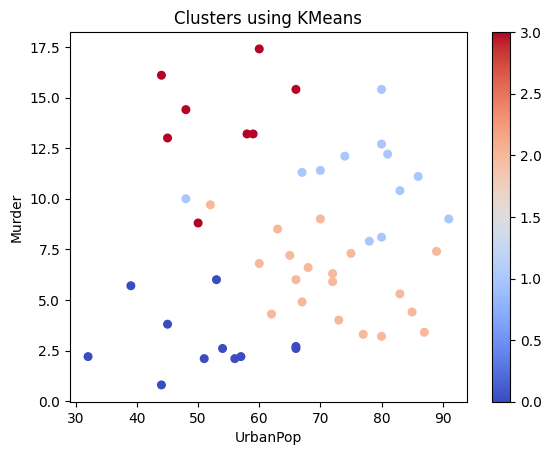

In [ ]:
cd1.plot(x="UrbanPop",y ="Murder",c=clf.labels_,kind="scatter",s=30 ,cmap=plt.cm.coolwarm)
plt.title('Clusters using KMeans')

Text(0.5, 1.0, 'Clusters using KMeans')

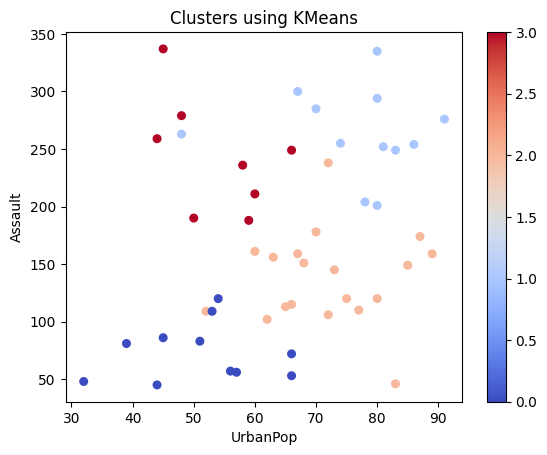

In [ ]:
cd1.plot(x="UrbanPop",y ="Assault",c=clf.labels_,kind="scatter",s=30 ,cmap=plt.cm.coolwarm)
plt.title('Clusters using KMeans')

Text(0.5, 1.0, 'Clusters using KMeans')

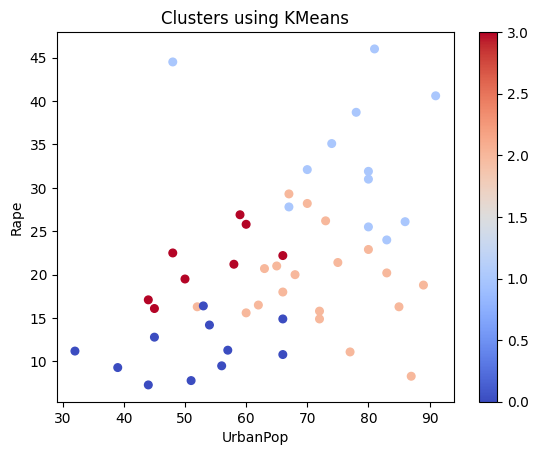

In [ ]:
cd1.plot(x="UrbanPop",y ="Rape",c=clf.labels_,kind="scatter",s=30 ,cmap=plt.cm.coolwarm)
plt.title('Clusters using KMeans')

In [ ]:
WCSS

[13.184122550256445,
 6.596893867946198,
 5.010878493006418,
 3.6834561535859143,
 3.184261813967723,
 2.900697431152566,
 2.599326768645046,
 2.379225445792171,
 2.026884643765273,
 1.8590290013161122]

Kmeans clustering with 4 clusters reduce overlapping patterns

DB Scan Clustering method

In [ ]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
array=cd1_norm.values
array

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512],
       [0.42771084, 0.54452055, 0.77966102, 0.81136951],
       [0.15060241, 0.22260274, 0.76271186, 0.09819121],
       [0.30722892, 0.6609589 , 0.6779661 , 0.21963824],
       [0.87951807, 0.99315068, 0.81355932, 0.63565891],
       [1.        , 0.56849315, 0.47457627, 0.47803618],
       [0.27108434, 0.00342466, 0.86440678, 0.33333333],
       [0.10843373, 0.25684932, 0.37288136, 0.17829457],
       [0.57831325, 0.69863014, 0.86440678, 0.43152455],
       [0.38554217, 0.23287671, 0.55932203, 0.35400517],
       [0.08433735, 0.03767123, 0.42372881, 0.10335917],
       [0.31325301, 0.23972603, 0.57627119, 0.27648579],
       [0.53614458, 0.21917808, 0.33898305, 0.23255814],
       [0.87951807, 0.69863014,

In [ ]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [ ]:
neigh = NearestNeighbors(n_neighbors=12)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

In [ ]:
cd1.shape

(50, 6)

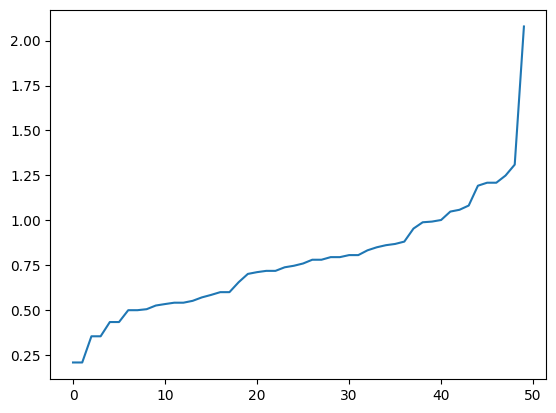

In [ ]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [ ]:
dbscan = DBSCAN(eps=1, min_samples=6)
dbscan.fit(X)

DBSCAN(eps=1, min_samples=6)

In [ ]:
dbscan.labels_

array([-1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,  0, -1,  0,  0,  0,  0,
       -1,  0, -1, -1, -1,  0, -1,  0,  0,  0, -1,  0, -1, -1, -1, -1,  0,
        0,  0, -1,  0, -1, -1,  0, -1, -1, -1, -1,  0,  0,  0,  0,  0])

In [ ]:
cd2=pd.DataFrame(dbscan.labels_,columns=['cluster'])
cd2

,cluster
0,-1
1,-1
2,-1
3,-1
4,-1
5,-1
6,0
7,-1
8,-1
9,-1


In [ ]:
cd3 = pd.concat([cd1,cd2],axis=1)
cd3

,States,Murder,Assault,UrbanPop,Rape,clust,cluster
0,Alabama,13.2,236,58,21.2,3,-1
1,Alaska,10.0,263,48,44.5,1,-1
2,Arizona,8.1,294,80,31.0,1,-1
3,Arkansas,8.8,190,50,19.5,3,-1
4,California,9.0,276,91,40.6,1,-1
5,Colorado,7.9,204,78,38.7,1,-1
6,Connecticut,3.3,110,77,11.1,2,0
7,Delaware,5.9,238,72,15.8,2,-1
8,Florida,15.4,335,80,31.9,1,-1
9,Georgia,17.4,211,60,25.8,3,-1


Text(0.5, 1.0, 'Clusters using DBScan')

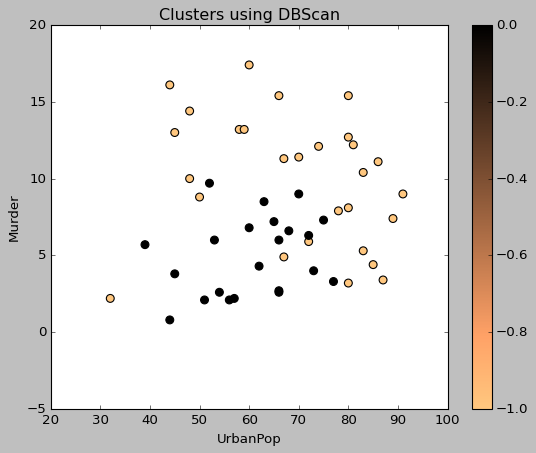

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('classic')
cd3.plot(x="UrbanPop",y ="Murder",c=dbscan.labels_ ,kind="scatter",s=50 ,cmap=plt.cm.copper_r)
plt.title('Clusters using DBScan')

Text(0.5, 1.0, 'Clusters using DBScan')

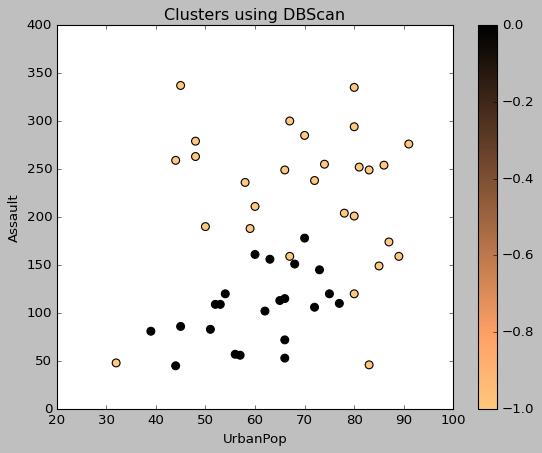

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('classic')
cd3.plot(x="UrbanPop",y ="Assault",c=dbscan.labels_ ,kind="scatter",s=50 ,cmap=plt.cm.copper_r)
plt.title('Clusters using DBScan')

Text(0.5, 1.0, 'Clusters using DBScan')

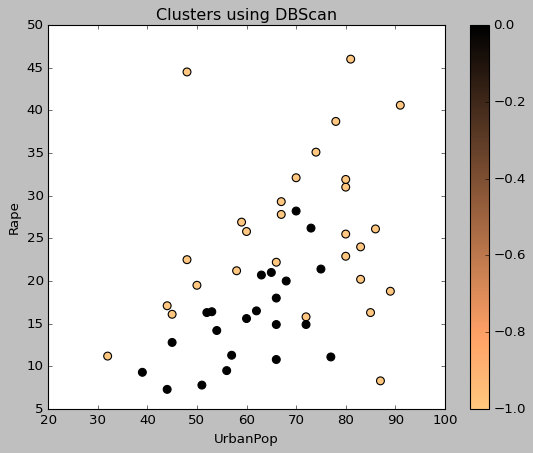

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('classic')
cd3.plot(x="UrbanPop",y ="Rape",c=dbscan.labels_ ,kind="scatter",s=50 ,cmap=plt.cm.copper_r)
plt.title('Clusters using DBScan')

In [ ]:
dl = dbscan.labels_

In [ ]:
import sklearn
sklearn.metrics.silhouette_score(X, dl)

0.2552597448455228